<a href="https://colab.research.google.com/github/elifsare/Real-time-Age-Gender-Ethnicity-Detection/blob/main/model0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
!ls

Mounted at /content/drive
drive  sample_data


In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

 96% 61.0M/63.2M [00:02<00:00, 43.3MB/s]
100% 63.2M/63.2M [00:02<00:00, 30.3MB/s]


In [4]:
!mkdir dataset

In [5]:
!unzip '/content/age-gender-and-ethnicity-face-data-csv.zip' -d dataset

Archive:  /content/age-gender-and-ethnicity-face-data-csv.zip
  inflating: dataset/age_gender.csv  


In [6]:
import numpy as np 
import pandas as pd

import tensorflow as tf
import tensorflow.keras.layers as L
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential  
from keras.layers import Dense, Conv2D, MaxPooling2D ,MaxPool2D, Flatten, Dropout, AveragePooling2D, Activation
from tensorflow.keras.layers import BatchNormalization

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('/content/dataset/age_gender.csv')

In [8]:
## Converting pixels into numpy array
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [9]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

data visulate

In [12]:
df1 = df.drop('img_name', axis=1)
y1 = df1.drop("pixels", axis=1)

In [13]:
y1.nunique()

age          104
ethnicity      5
gender         2
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


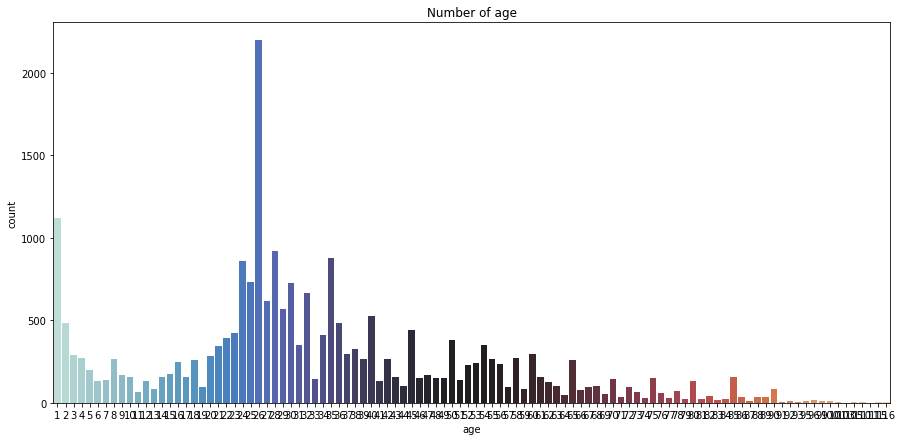

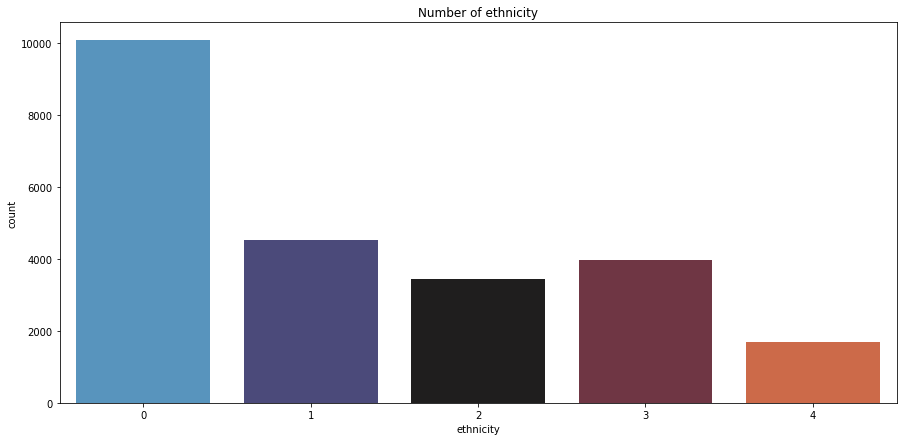

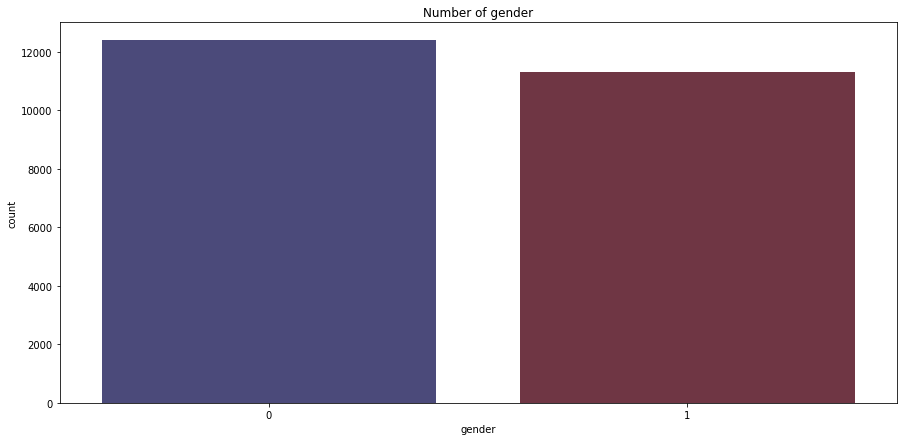

In [14]:
import seaborn as sns
for i in y1.columns:
    plt.figure(figsize=(15,7))
    g = sns.countplot(y1[i], palette="icefire")
    plt.title("Number of {}".format(i))

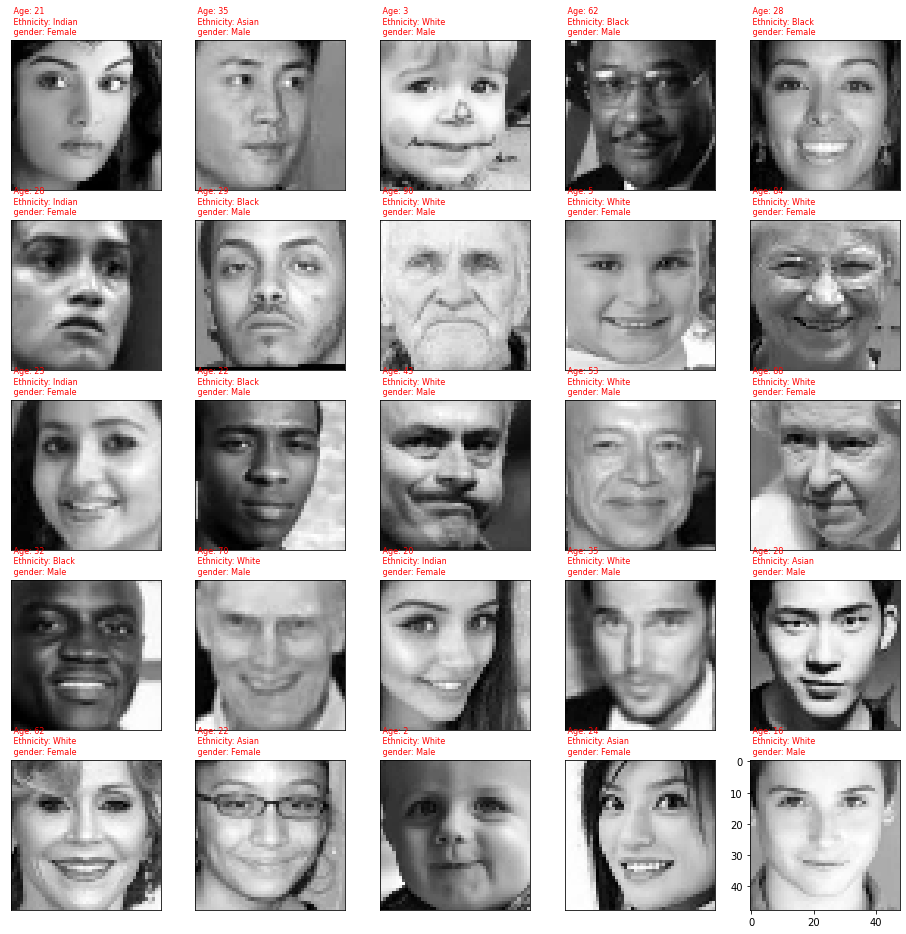

In [25]:
plt.figure(figsize=(16, 16))

for i in range(25):  
    index = np.random.randint(0, len(df))
    plt.xticks([])
    plt.yticks([])   
    plt.grid(False)
    plt.subplot(5, 5, i+1)
    plt.imshow(df['pixels'].iloc[index].reshape(48, 48),"gray")
    plt.title(' Age: {}\n Ethnicity: {}\n gender: {}'.format(df['age'].iloc[index], {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Other"}[df['ethnicity'].iloc[index]], {0:"Male", 1:"Female"}[df['gender'].iloc[index]]),loc="left",color='red',fontsize = 8)

plt.show()

Age Model

In [16]:
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))
y = df['age']
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, y, test_size=0.3, random_state=30)

image generetor

In [17]:
train_generator = ImageDataGenerator(width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    rescale = 1./255,
                                    validation_split = 0.2
                                    )
validation_generator = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [18]:
train_flow = train_generator.flow(X_test_age,
                                  y_test_age,
                                  batch_size=32)

validation_flow = validation_generator.flow(X_test_age,
                                            y_test_age,
                                            batch_size=32)

Checkpoint

In [19]:
root = '/content/drive/MyDrive/DeepLearningProject/Gender&Age/'
checkPointer = ModelCheckpoint(root + 'checkPoint_model.h5', verbose = 1, save_best_only = True)

overfitting engelliyoruz
EarlyStop

In [20]:
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=6,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkPointer, reduce_learningrate]

"""
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])
     """

"\nmodel.compile(loss='categorical_crossentropy',\n              optimizer = Adam(lr=0.001),\n              metrics=['accuracy'])\n     "

In [26]:
from keras.models import Sequential     
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AveragePooling2D, Activation
from keras.optimizers import SGD, Adam, RMSprop, Adamax 
from keras.utils import np_utils  
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers


model_age = Sequential()
model_age.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model_age.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2, 2)))
model_age.add(Dropout(0.2))

model_age.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2, 2)))
model_age.add(Dropout(0.2))
    
model_age.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2, 2)))
model_age.add(Dropout(0.2))

model_age.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2, 2)))
model_age.add(Dropout(0.2))

model_age.add(Flatten()) 
model_age.add(Dense(256,activation = 'relu'))
model_age.add(BatchNormalization())
model_age.add(Dropout(0.2))
    
model_age.add(Dense(512,activation = 'relu'))
model_age.add(BatchNormalization())
model_age.add(Dropout(0.2))

model_age.add(Dense(1, activation='softmax'))

model_age.summary()

model_age.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

In [22]:
epochs = 60
batch_size = 64

In [27]:
model_age.fit(train_flow,
              epochs = epochs,
              validation_data =  validation_flow
)

Epoch 1/60
223/223 [==============================] - 18s 36ms/step - loss: 7.2024 - accuracy: 0.0471 - val_loss: 7.2216 - val_accuracy: 0.0471
Epoch 2/60
223/223 [==============================] - 7s 32ms/step - loss: 7.2439 - accuracy: 0.0471 - val_loss: 7.2690 - val_accuracy: 0.0471
Epoch 3/60
223/223 [==============================] - 7s 32ms/step - loss: 7.2980 - accuracy: 0.0471 - val_loss: 7.3276 - val_accuracy: 0.0471
Epoch 4/60
223/223 [==============================] - 7s 32ms/step - loss: 7.3648 - accuracy: 0.0471 - val_loss: 7.4081 - val_accuracy: 0.0471
Epoch 5/60
223/223 [==============================] - 7s 32ms/step - loss: 7.4632 - accuracy: 0.0471 - val_loss: 7.5202 - val_accuracy: 0.0471
Epoch 6/60
223/223 [==============================] - 7s 32ms/step - loss: 7.5724 - accuracy: 0.0471 - val_loss: 7.6317 - val_accuracy: 0.0471
Epoch 7/60
223/223 [==============================] - 7s 32ms/step - loss: 7.6856 - accuracy: 0.0471 - val_loss: 7.7443 - val_accuracy: 0.047

KeyboardInterrupt: ignored

Model of gender